# GANs Image Generation

In this notebook, we will explore how Generative Adversarial Networks (GANs) generate images. We will use a pretrained GAN model (BigGAN) to generate images from random noise.

## Instructions
1. Run the code below to generate an image from random noise.
2. Modify the latent vector to generate different images.
3. Experiment with generating different images by altering the latent vector and visualizing the results.


In [46]:
import torch
from pytorch_pretrained_biggan import BigGAN, one_hot_from_int, truncated_noise_sample
from torchvision import transforms
from PIL import Image
import numpy as np
# Load the pretrained BigGAN-deep-256 model
model = BigGAN.from_pretrained('biggan-deep-256')   # downloads weights if needed
model.eval()                                       # inference mode


BigGAN(
  (embeddings): Linear(in_features=1000, out_features=128, bias=False)
  (generator): Generator(
    (gen_z): Linear(in_features=256, out_features=32768, bias=True)
    (layers): ModuleList(
      (0-2): 3 x GenBlock(
        (bn_0): BigGANBatchNorm(
          (scale): Linear(in_features=256, out_features=2048, bias=False)
          (offset): Linear(in_features=256, out_features=2048, bias=False)
        )
        (conv_0): Conv2d(2048, 512, kernel_size=(1, 1), stride=(1, 1))
        (bn_1): BigGANBatchNorm(
          (scale): Linear(in_features=256, out_features=512, bias=False)
          (offset): Linear(in_features=256, out_features=512, bias=False)
        )
        (conv_1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        (bn_2): BigGANBatchNorm(
          (scale): Linear(in_features=256, out_features=512, bias=False)
          (offset): Linear(in_features=256, out_features=512, bias=False)
        )
        (conv_2): Conv2d(512, 512, kernel_siz

In [49]:
#  • Choose your truncation ψ (0.3 – 1.0) and an ImageNet class index (0–999)
truncation = 0.4
class_idx  = 817

#  • Sample noise and class vectors
noise_np   = truncated_noise_sample(truncation=truncation, batch_size=1)
class_np   = one_hot_from_int([class_idx], batch_size=1)
noise      = torch.from_numpy(noise_np)
class_vec  = torch.from_numpy(class_np)

#  • Generate (no gradients needed)
with torch.no_grad():
    output = model(noise, class_vec, truncation)  # ⇒ tensor in [–1,+1]

#  • Post-process → PIL
img_tensor = output.squeeze(0).clamp(-1,1).add(1).div(2)  # map to [0,1]
pil_img    = transforms.ToPILImage()(img_tensor.cpu())

#  • Display
pil_img.show()


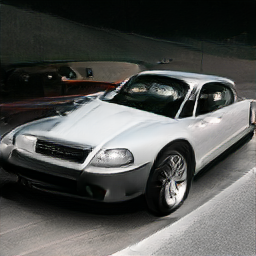

'Seed = 0, ψ = 1.0'

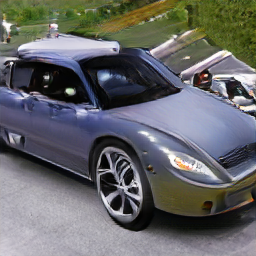

'Seed = 42, ψ = 1.0'

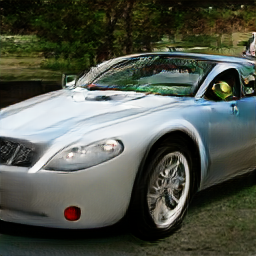

'Seed = 123, ψ = 1.0'

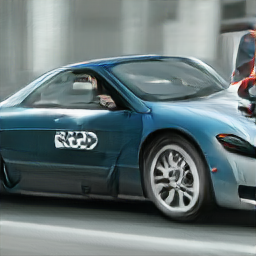

'Seed = 999, ψ = 1.0'

In [48]:
truncation = 1.0
class_idx  = 817
for seed in [0, 42, 123, 999]:
    # 1) Seed NumPy so truncated_noise_sample is reproducible
    np.random.seed(seed)
    
    # 2) Sample truncated noise (now varies with seed)
    noise_np = truncated_noise_sample(truncation=truncation, batch_size=1)
    noise    = torch.from_numpy(noise_np)
    
    # 3) Build class vector
    class_np  = one_hot_from_int([class_idx], batch_size=1)
    class_vec = torch.from_numpy(class_np)
    
    # 4) Generate
    with torch.no_grad():
        out = model(noise, class_vec, truncation)
    
    # 5) Post-process to PIL
    img_t = out.squeeze(0).clamp(-1,1).add(1).div(2)  # map [–1,1]→[0,1]
    pil   = transforms.ToPILImage()(img_t.cpu())
    
    # 6) Display
    display(pil, f"Seed = {seed}, ψ = {truncation}")

## Reflection

Now that you have generated images, write a brief report reflecting on your observations:

1. How did the generated images change when you modified the latent vector?
2. What patterns did you notice in the generated images? Were they realistic?
3. How does the process of generating images from noise differ from traditional image generation methods?
4. What challenges or limitations did you observe with the GAN model?